# HW1- Problem 2

Write a program which calculates $e^{−x}$ using the three algorithms giving in lectures on 29 January 2019. Plot $e^{−x}$
for each algorithm and using numpy as well as the difference between each algorithm and the numpy values as a function of x. Discuss the dependency of your answer on your choice of nmax.

There are 3 possible algorithms for $e^{-x}$. Simple, recursion, and inverse
$$e^{-x}=\sum_{n=0}^{\infty} \frac{(-1)^n x^n}{n!}$$

Recursion: $$e^{-x}=\sum_{n=0}^{\infty}S_n$$     where      $$S_n=-S_{n-1}\frac{x}{n}$$

Inverse:$$e^x=\sum_{n=0}^{\infty}S_n$$ where $$S_n=\frac{-x^n}{n!}$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Let us write a function to calculate e^-x using the first equation
def e_simple(x,nmax):
    '''Calculates e^(-x) given a value of x'''
    n=np.arange(0,nmax,1)
    d=[np.math.factorial(i) for i in n]
    return np.sum(((-1)**n)*(x**n)/d)

e_simple=np.vectorize(e_simple)

In [3]:
def e_rec(x,n):
    '''Calculate the e^(-x) recursively'''
    s=1.00
    for i in range(1,n):
        s=s+(-s*x/i)
    return s
e_rec=np.vectorize(e_rec)

In [4]:
#Last we will calculate e^(-x) using the inverse
def expx(x,nmax):
    '''Calculates e^x'''
    n=np.arange(0,nmax,1)
    d=[np.math.factorial(i) for i in n]
    return np.sum(x**n/d)

expx=np.vectorize(expx)

In [5]:
#create an array of x
x=np.linspace(-100.0,100.0,22)

xx=np.arange(-100,110,10)

In [6]:
#Create plot
def plot(y,y1,y2,name,legend):
    '''Create plot of e^(-x) using np.exp
    and compares it with a given function'''
    fig=plt.figure(figsize=(10,5))
    ax=fig.add_subplot(111)
    plt.title('{}'.format(name),size=15)
    ax.set_xlabel('x',size=15)
    ax.set_ylabel('log($e^{-x}$)',size=15)
    ax.plot(x,1/np.exp(x),'g-',x,y,'b-',x,y1,'r--',x,y2,'k--')
    ax.set_xticks(xx)
    ax.legend(legend)
    plt.yscale('log')
    ax.grid()
    return fig.savefig('{}.pdf'.format(name))


In [19]:
def plot_diff(y,y1,y2,name,legend):
    '''Create plots of given function-(1/np.exp(x))'''
    fig=plt.figure(figsize=(10,5))
    ax=fig.add_subplot(111)
    numpy=1/np.exp(x)
    ax.set_title('{}'.format(name),size=15)
    ax.set_xlabel('x',size=15)
    ax.set_ylabel('$e^{-x}$-numpy.exp(-x)',size=15)
    ax.plot(x,y-numpy,'b-',x,y1-numpy,'r--',x,y2-numpy,'k--')
    ax.set_xticks(xx)
    ax.legend(legend)
    ax.grid()
    
    return fig.savefig('{}.pdf'.format(name))

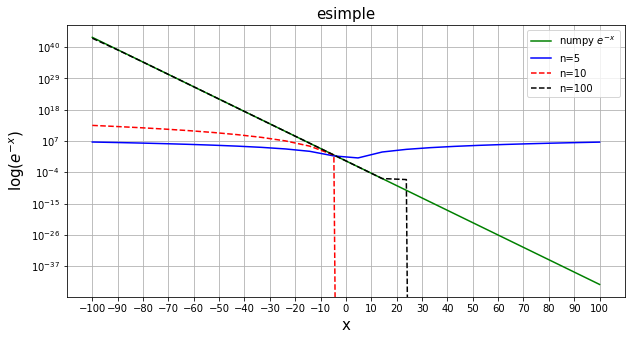

In [20]:
legend=['numpy $e^{-x}$','n=5','n=10','n=100']
plot(e_simple(x,5),e_simple(x,10),e_simple(x,100),'esimple',legend)

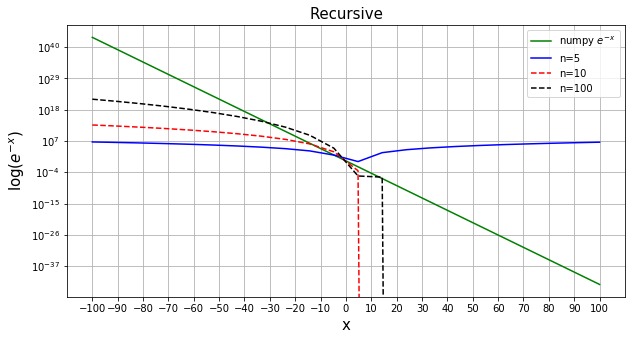

In [21]:
legend2=['numpy $e^{-x}$','n=5','n=10','n=100']
plot(e_rec(x,5),e_rec(x,10),e_rec(x,20),'Recursive',legend2)


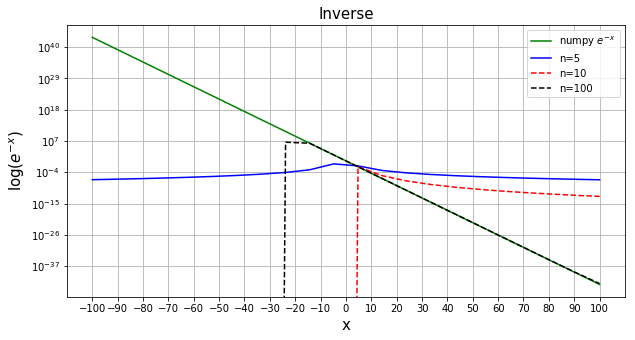

In [22]:
legend3=['numpy $e^{-x}$','n=5','n=10','n=100']
plot(1/expx(x,5),1/expx(x,10),1/expx(x,100),'Inverse',legend3)

Notice that in all 3 cases value calculated by esimple,recursive, and inverse gets closer to the value generated by numpy as nmax increase.

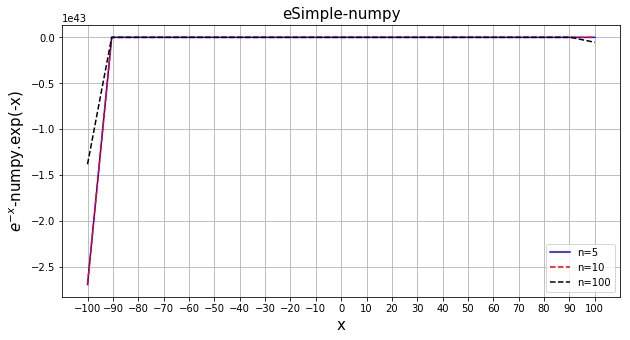

In [23]:
#Plots difference of esimple and 1/numpy.exp
plot_diff(e_simple(x,5),e_simple(x,10),e_simple(x,100),'eSimple-numpy',legend[1:])

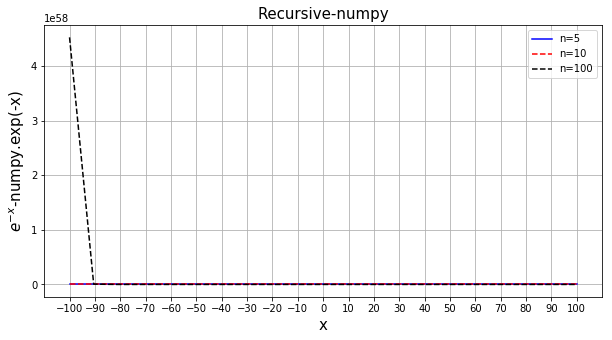

In [24]:
#Plots the difference between Recursive e^(-x) and 1/np.exp
plot_diff(e_rec(x,5),e_rec(x,10),e_rec(x,100),'Recursive-numpy',legend[1:])

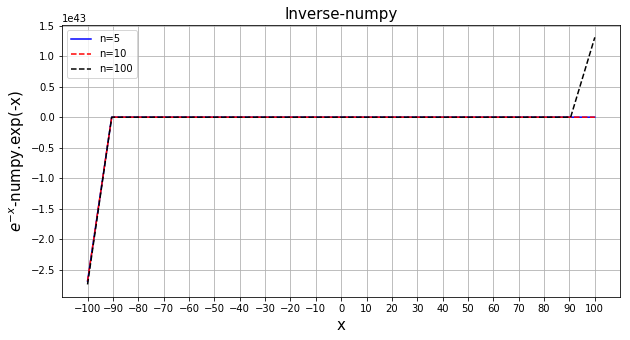

In [25]:
#Plots the difference between Inverse e^(x) and 1/np.exp
plot_diff(expx(x,5),expx(x,10),expx(x,100),'Inverse-numpy',legend[1:])

Difference between $e^{-x}-numpy.exp(-x)$ increases as $x>=90$ for inverse case. That is the accuracy of the difference decreases as x>=90.
Difference between $e^{-x}-numpy.exp(-x)$ increases for x<=90 and x>=90 for the simple case.